In [1]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

2024-08-07 00:58:03.606019: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 00:58:03.609006: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 00:58:03.617935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 00:58:03.629761: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 00:58:03.634094: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 00:58:03.645470: I tensorflow/core/platform/cpu_feature_gu

In [2]:
FOLDER = 'imagens_celulas_1000/'
# FOLDER = 'dataset.celulas/'
positivas = os.listdir(FOLDER + 'positivos/')
negativas = os.listdir(FOLDER + 'negativos/')


In [3]:
dataset = list()

SIZE = 64
label = list()

print('reading positives')
for i, image_name in enumerate(positivas):
  if (image_name.split('.')[1]== 'png'):
    image = cv2.imread(FOLDER + 'positivos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

print('reading negatives')
for i, image_name in enumerate(negativas):
  if (image_name.split('.')[1]== 'png'):
    image = cv2.imread(FOLDER + 'negativos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)

reading positives
reading negatives


label =  1
imagem


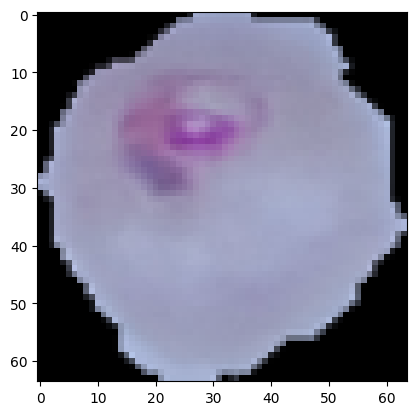

In [4]:
import matplotlib.pyplot as plt
index = 10
print('label = ', label[index])
print('imagem')
plt.imshow(dataset[index])

In [6]:
X = np.array(dataset)
X = X/255

print(np.shape(X))

y = tf.keras.utils.to_categorical(np.array(label))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
print(np.shape(X_train))
print(np.shape(y_train))

(2000, 64, 64, 3)
(1800, 64, 64, 3)
(1800, 2)


In [7]:
TAM = (SIZE, SIZE, 3)
inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(inp)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)


conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(drop1)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)

drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)


conv3 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(drop2)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv3)

drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)


conv4 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(drop3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv4)

drop4= tf.keras.layers.Dropout(rate = 0.2)(pool4)


flat = tf.keras.layers.Flatten()(drop4)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop5)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation = 'sigmoid')(drop5)

model = tf.keras.Model(inputs = inp, outputs = out)

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])


model.summary()

I0000 00:00:1723003363.554993  627581 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-07 01:02:43.565127: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,138 (1.61 MB)

 Trainable params: 423,138 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 30, validation_split = 0.1)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.5369 - loss: 0.6909 - val_accuracy: 0.4333 - val_loss: 0.6983
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5140 - loss: 0.6930 - val_accuracy: 0.4333 - val_loss: 0.6945
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6084 - loss: 0.6673 - val_accuracy: 0.5667 - val_loss: 0.6505
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6386 - loss: 0.5999 - val_accuracy: 0.7167 - val_loss: 0.5897
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6930 - loss: 0.5657 - val_accuracy: 0.6667 - val_loss: 0.5944
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6643 - loss: 0.5884 - val_accuracy: 0.6556 - val_loss: 0.6222
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.6851 - loss: 0.5711 - val_accuracy: 0.6944 - val_loss: 0.5779
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7063 - loss: 0.5390 - val_accuracy: 0.7389 - v

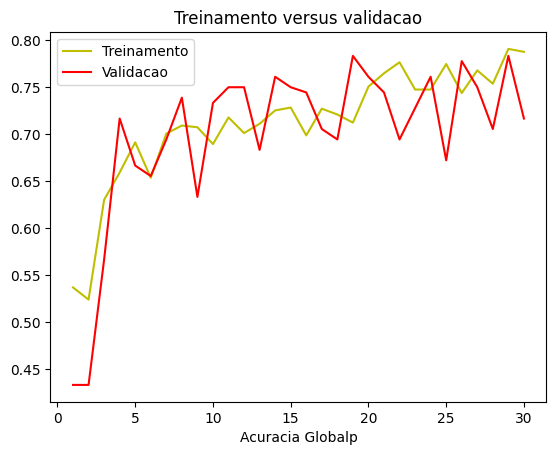

In [9]:
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validacao")

plt.title("Treinamento versus validacao")
plt.xlabel("epocas")
plt.xlabel("Acuracia Globalp")
plt.legend()
plt.show()

In [10]:
MODEL_NAME='malaria_model.h5'
model.save(MODEL_NAME)


In [11]:
from tensorflow.keras.models import load_model

model = load_model(MODEL_NAME)

_, score = model.evaluate(X_test, y_test)

# accuracy: 0.9650
print(score)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6199 - loss: 0.6468
0.6449999809265137
